<a href="https://colab.research.google.com/github/Sordhiq/Loan_Approval_Prediction/blob/main/notebookn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loan Approval Prediction

##### This solution aims to predict Loan Approval among applicants to a financial institution

In [484]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing and feature engineering libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import joblib

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [485]:
# Loading the dataset
data = pd.read_csv("dataset.csv")

# Displaying the first few rows of the dataset
data.head()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/06/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/05/2023,6/16/2023,4306,2,04/07/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,01/08/2023,3/20/2023,4842,3,09/07/2023,Praise,Pending,05/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,09/08/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,07/05/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,03/04/2023,7/27/2023,2209,5,02/12/2023,Complaint,Resolved,11/21/2023,1


In [486]:
# Displaying the shape of the dataset
print("The Dataset has {} rows and {} columns.".format(data.shape[0], data.shape[1]))

The Dataset has 5000 rows and 40 columns.


In [487]:
# removing white spaces from the columns
data.columns = data.columns.str.strip()
data.columns

Index(['Customer ID', 'First Name', 'Last Name', 'Age', 'Gender', 'Address',
       'City', 'Contact Number', 'Email', 'Account Type', 'Account Balance',
       'Date Of Account Opening', 'Last Transaction Date', 'TransactionID',
       'Transaction Date', 'Transaction Type', 'Transaction Amount',
       'Account Balance After Transaction', 'Branch ID', 'Loan ID',
       'Loan Amount', 'Loan Type', 'Interest Rate', 'Loan Term (Months)',
       'Approval/Rejection Date', 'Loan Status', 'CardID', 'Card Type',
       'Credit Limit', 'Credit Card Balance', 'Minimum Payment Due',
       'Payment Due Date', 'Last Credit Card Payment Date', 'Rewards Points',
       'Feedback ID', 'Feedback Date', 'Feedback Type', 'Resolution Status',
       'Resolution Date', 'Anomaly'],
      dtype='object')

##### We begin dropping irrelevant features that wouldn't contribute to our analysis

In [488]:
# Dropping the ID columns, since they are for identification purposes
for i in data.columns:
    if "id" in i.strip().lower():
        data.drop(i, axis=1, inplace=True)

columns_to_drop = ['First Name', 'Last Name', 'Address', 'Contact Number', 'Email'] # non useful columns
data.drop(columns_to_drop, axis=1, inplace=True)
# Displaying the first few rows of the dataset after removing ID columns
data.head()

,Age,Gender,City,Account Type,Account Balance,Date Of Account Opening,Last Transaction Date,Transaction Date,Transaction Type,Transaction Amount,...,Credit Card Balance,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,45,Male,Fort Worth,Current,1313.38,5/26/2006,4/23/2023,12/07/2023,Withdrawal,1457.61,...,4524.32,226.22,11/26/2023,3/20/2023,8142,10/06/2023,Suggestion,Resolved,1/22/2023,1
1,47,Female,Louisville,Current,5988.46,03/02/2006,1/27/2023,4/27/2023,Deposit,1660.99,...,856.70,42.84,11/05/2023,6/16/2023,4306,04/07/2023,Complaint,Resolved,8/27/2023,1
2,25,Female,Philadelphia,Current,8277.88,7/19/2015,01/01/2023,04/05/2023,Deposit,839.91,...,3242.36,162.12,01/08/2023,3/20/2023,4842,09/07/2023,Praise,Pending,05/11/2023,1
3,52,Other,Oklahoma City,Savings,7487.21,1/30/2008,08/02/2023,7/28/2023,Withdrawal,4908.89,...,4329.17,216.46,09/08/2023,10/15/2023,9463,5/28/2023,Complaint,Resolved,07/05/2023,1
4,68,Other,Phoenix,Savings,6993.55,5/25/2021,3/27/2023,1/16/2023,Transfer,589.07,...,25.72,1.29,03/04/2023,7/27/2023,2209,02/12/2023,Complaint,Resolved,11/21/2023,1


In [489]:
# looking out for missing entries within the columns
data.isnull().sum()

,0
Age,0
Gender,0
City,0
Account Type,0
Account Balance,0
Date Of Account Opening,0
Last Transaction Date,0
Transaction Date,0
Transaction Type,0
Transaction Amount,0


##### There are no missing customer information in the dataset

In [490]:
# Look out for duplicate transactions
data.duplicated().value_counts()

,count
False,5000


##### There are no Duplicate entries across the rows

In [491]:
# inspecting data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5000 non-null   int64  
 1   Gender                             5000 non-null   object 
 2   City                               5000 non-null   object 
 3   Account Type                       5000 non-null   object 
 4   Account Balance                    5000 non-null   float64
 5   Date Of Account Opening            5000 non-null   object 
 6   Last Transaction Date              5000 non-null   object 
 7   Transaction Date                   5000 non-null   object 
 8   Transaction Type                   5000 non-null   object 
 9   Transaction Amount                 5000 non-null   float64
 10  Account Balance After Transaction  5000 non-null   float64
 11  Loan Amount                        5000 non-null   objec

##### From the output above, there are some inconsistencies in the datatypes. For instance, the `Loan Amount` column is in Object, instead of Float. Also, all date variables are in Object, instead of datetime.

##### We will fix the datatypes below and categorize all features into similar datatypes

In [492]:
# Converting Date columns to datetime format
for i in data.columns:
    if "date" in i.lower():
        data[i] = pd.to_datetime(data[i], errors='coerce')

# Converting 'Loan Amount' to numeric after removing commas
data['Loan Amount'] = data['Loan Amount'].str.replace(",", "")
data['Loan Amount'] = data['Loan Amount'].astype(float)

In [493]:
# categorizing all features into their respective datatypes
cats = data.select_dtypes('object')         # Categorical
nums = data.select_dtypes(['int', 'float']) # Numerical
date = data.select_dtypes('datetime')       # Datetime

In [494]:
# conducting Descriptive Statistics
data.select_dtypes([int, float]).describe()

,Age,Account Balance,Transaction Amount,Account Balance After Transaction,Loan Amount,Interest Rate,Loan Term (Months),Credit Limit,Credit Card Balance,Minimum Payment Due,Rewards Points,Anomaly
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,43.469800,5060.570918,2508.501144,5037.418898,25501.042806,5.505038,36.520800,5549.035830,2487.40084,124.370134,4966.161800,0.880000
std,15.145672,2849.356481,1450.194986,4053.220017,14039.732628,2.629752,16.924315,2581.718105,1446.80295,72.340102,2901.410915,0.475021
min,18.000000,107.200000,10.570000,-4878.760000,1006.370000,1.000000,12.000000,1007.000000,1.45000,0.070000,1.000000,-1.000000
25%,30.000000,2582.777500,1241.150000,2047.205000,13315.305000,3.200000,24.000000,3314.065000,1243.51750,62.180000,2475.250000,1.000000
50%,43.000000,5075.500000,2494.025000,5089.785000,25909.705000,5.520000,36.000000,5567.485000,2461.62000,123.080000,4950.500000,1.000000
75%,57.000000,7509.760000,3796.222500,8036.367500,37441.570000,7.832500,48.000000,7786.040000,3722.58000,186.125000,7483.250000,1.000000
max,69.000000,9998.110000,4998.390000,14911.380000,49993.490000,10.000000,60.000000,9997.780000,4997.11000,249.860000,9999.000000,1.000000


##### The table of `Descriptive Statistics` indicated the following:
###### | `Age`: An average Loan applicant's age is `43 years`, while the youngest applicant is `18 years` and the oldest applicant being `69 years` of age. An average applicant has `5,060` as their `Account Balance` with some having as much as `9,998` and others having as low as `107` naira.  

In [495]:
nums.head()

,Age,Account Balance,Transaction Amount,Account Balance After Transaction,Loan Amount,Interest Rate,Loan Term (Months),Credit Limit,Credit Card Balance,Minimum Payment Due,Rewards Points,Anomaly
0,45,1313.38,1457.61,2770.99,32200.06,2.64,36,1737.88,4524.32,226.22,8142,1
1,47,5988.46,1660.99,7649.45,47743.52,2.48,36,1799.36,856.70,42.84,4306,1
2,25,8277.88,839.91,7437.97,47981.31,7.84,24,6112.96,3242.36,162.12,4842,1
3,52,7487.21,4908.89,12396.10,4482.80,7.21,48,2069.41,4329.17,216.46,9463,1
4,68,6993.55,589.07,6404.48,1092.33,5.37,12,2765.30,25.72,1.29,2209,1


In [496]:
cats.head()

,Gender,City,Account Type,Transaction Type,Loan Type,Loan Status,Card Type,Feedback Type,Resolution Status
0,Male,Fort Worth,Current,Withdrawal,Mortgage,Rejected,AMEX,Suggestion,Resolved
1,Female,Louisville,Current,Deposit,Auto,Approved,MasterCard,Complaint,Resolved
2,Female,Philadelphia,Current,Deposit,Auto,Closed,AMEX,Praise,Pending
3,Other,Oklahoma City,Savings,Withdrawal,Personal,Approved,MasterCard,Complaint,Resolved
4,Other,Phoenix,Savings,Transfer,Mortgage,Approved,Visa,Complaint,Resolved


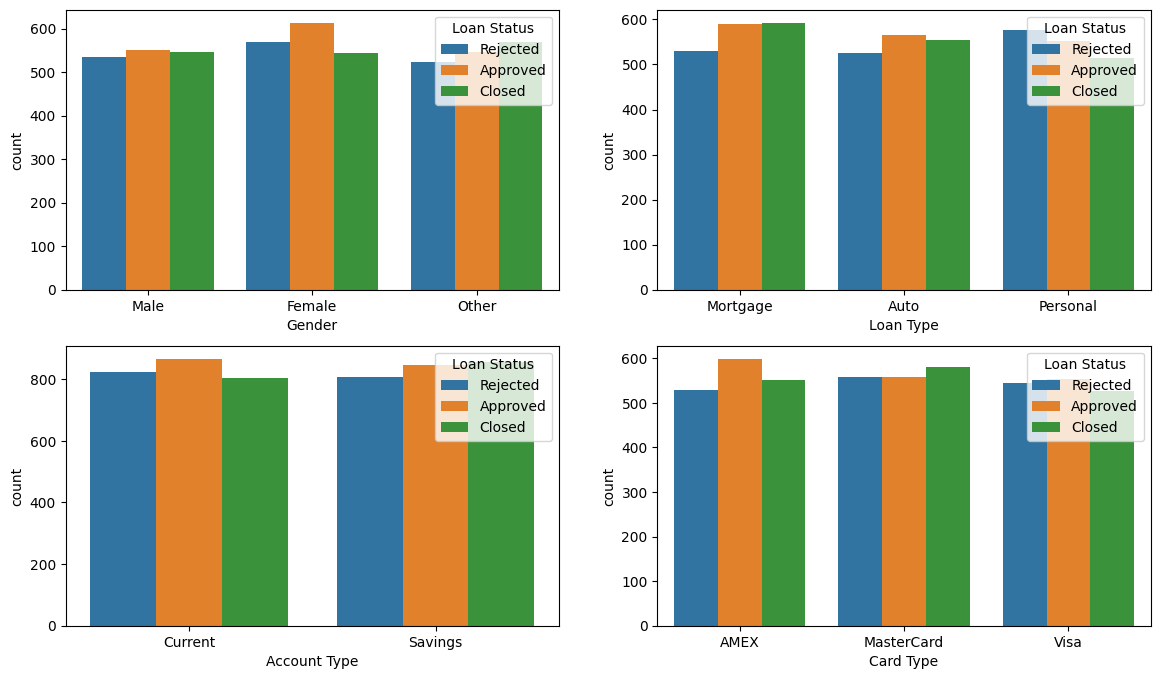

In [497]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
sns.countplot(data=data, x='Gender', hue='Loan Status', ax=ax[0,0])
sns.countplot(data=data, x='Loan Type', hue='Loan Status', ax=ax[0,1])
sns.countplot(data=data, x='Account Type', hue='Loan Status', ax=ax[1,0])
sns.countplot(data=data, x='Card Type', hue='Loan Status', ax=ax[1,1])
plt.show()

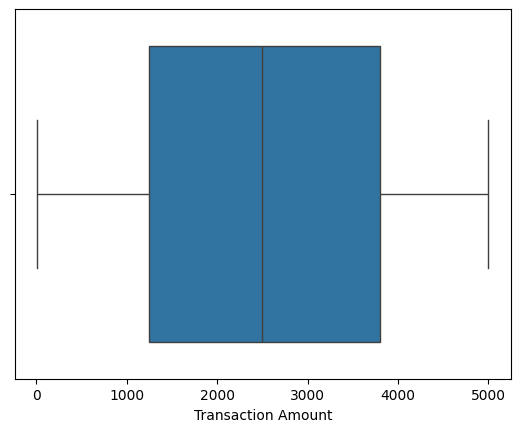

In [498]:
sns.boxplot(data=data, x='Transaction Amount')
plt.show()

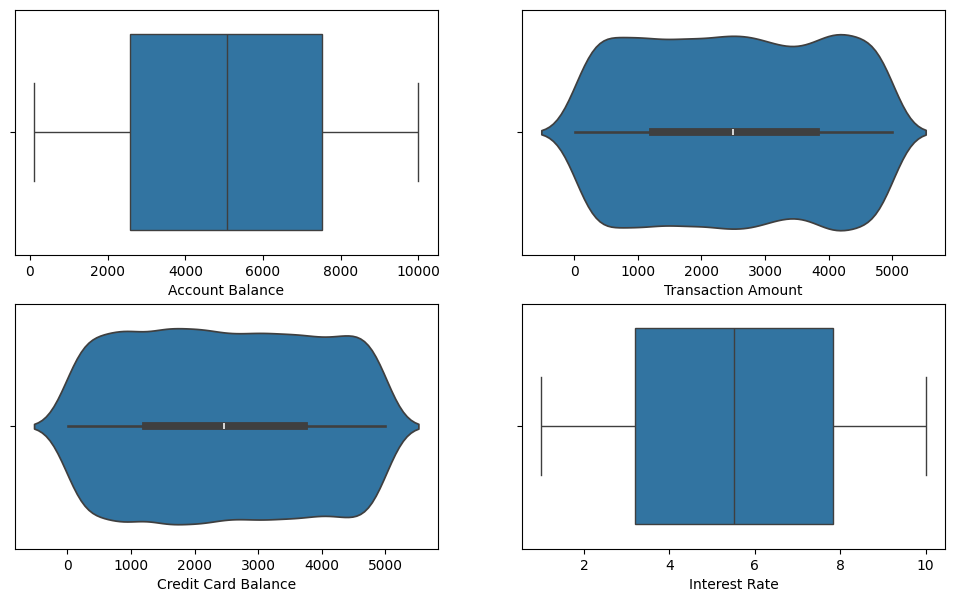

In [499]:
fig, ax = plt.subplots(2,2, figsize=(12, 7))
sns.boxplot(data=data, x='Account Balance', ax=ax[0,0])
sns.violinplot(data=data, x='Transaction Amount', ax=ax[0,1])
sns.boxplot(data=data, x='Interest Rate', ax=ax[1,1])
sns.violinplot(data=data, x='Credit Card Balance', ax=ax[1,0])
plt.show()

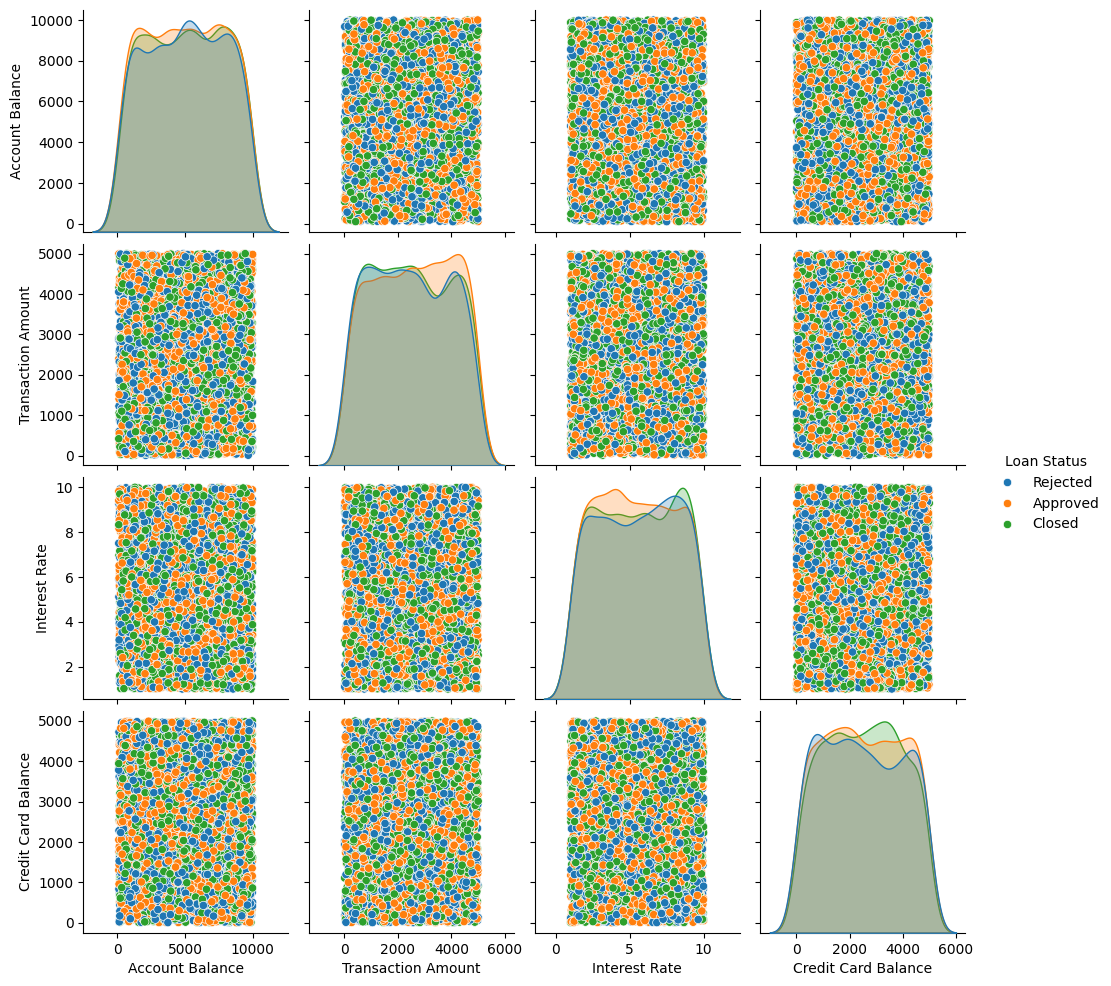

In [500]:
sns.pairplot(data, hue='Loan Status', vars=['Account Balance', 'Transaction Amount', 'Interest Rate', 'Credit Card Balance'])

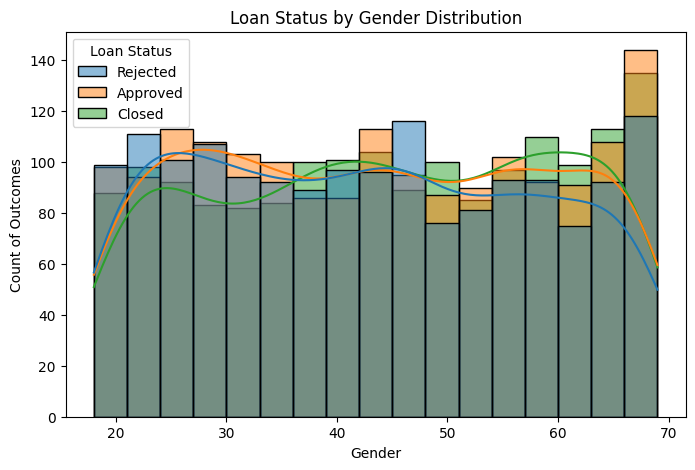

In [501]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=data, x='Age', kde=True, hue='Loan Status', ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel("Count of Outcomes")
ax.set_title("Loan Status by Gender Distribution")
plt.show()

In [502]:
for i in data.columns:
    if "date" in i.lower():
        data = data.drop(i, axis=1)
data.head()

,Age,Gender,City,Account Type,Account Balance,Transaction Type,Transaction Amount,Account Balance After Transaction,Loan Amount,Loan Type,...,Loan Term (Months),Loan Status,Card Type,Credit Limit,Credit Card Balance,Minimum Payment Due,Rewards Points,Feedback Type,Resolution Status,Anomaly
0,45,Male,Fort Worth,Current,1313.38,Withdrawal,1457.61,2770.99,32200.06,Mortgage,...,36,Rejected,AMEX,1737.88,4524.32,226.22,8142,Suggestion,Resolved,1
1,47,Female,Louisville,Current,5988.46,Deposit,1660.99,7649.45,47743.52,Auto,...,36,Approved,MasterCard,1799.36,856.70,42.84,4306,Complaint,Resolved,1
2,25,Female,Philadelphia,Current,8277.88,Deposit,839.91,7437.97,47981.31,Auto,...,24,Closed,AMEX,6112.96,3242.36,162.12,4842,Praise,Pending,1
3,52,Other,Oklahoma City,Savings,7487.21,Withdrawal,4908.89,12396.10,4482.80,Personal,...,48,Approved,MasterCard,2069.41,4329.17,216.46,9463,Complaint,Resolved,1
4,68,Other,Phoenix,Savings,6993.55,Transfer,589.07,6404.48,1092.33,Mortgage,...,12,Approved,Visa,2765.30,25.72,1.29,2209,Complaint,Resolved,1


In [503]:
data.columns

Index(['Age', 'Gender', 'City', 'Account Type', 'Account Balance',
       'Transaction Type', 'Transaction Amount',
       'Account Balance After Transaction', 'Loan Amount', 'Loan Type',
       'Interest Rate', 'Loan Term (Months)', 'Loan Status', 'Card Type',
       'Credit Limit', 'Credit Card Balance', 'Minimum Payment Due',
       'Rewards Points', 'Feedback Type', 'Resolution Status', 'Anomaly'],
      dtype='object')

In [504]:
columns_to_drop = ['Account Balance After Transaction', 'Minimum Payment Due',
                   'Feedback Type', 'Resolution Status']
data.drop(columns_to_drop, axis=1, inplace=True)

In [505]:
# Engineering new relevant features for loan prediction
data['Credit Utilization'] = data['Credit Card Balance'] / data['Credit Limit']
data['Loan-to-Credit Ratio'] = data['Loan Amount'] / data['Credit Limit']
data['Spending Rate'] = data['Transaction Amount'] / data['Account Balance']
data.head()

,Age,Gender,City,Account Type,Account Balance,Transaction Type,Transaction Amount,Loan Amount,Loan Type,Interest Rate,Loan Term (Months),Loan Status,Card Type,Credit Limit,Credit Card Balance,Rewards Points,Anomaly,Credit Utilization,Loan-to-Credit Ratio,Spending Rate
0,45,Male,Fort Worth,Current,1313.38,Withdrawal,1457.61,32200.06,Mortgage,2.64,36,Rejected,AMEX,1737.88,4524.32,8142,1,2.603356,18.528356,1.109816
1,47,Female,Louisville,Current,5988.46,Deposit,1660.99,47743.52,Auto,2.48,36,Approved,MasterCard,1799.36,856.70,4306,1,0.476114,26.533612,0.277365
2,25,Female,Philadelphia,Current,8277.88,Deposit,839.91,47981.31,Auto,7.84,24,Closed,AMEX,6112.96,3242.36,4842,1,0.530408,7.849112,0.101464
3,52,Other,Oklahoma City,Savings,7487.21,Withdrawal,4908.89,4482.80,Personal,7.21,48,Approved,MasterCard,2069.41,4329.17,9463,1,2.091983,2.166221,0.655637
4,68,Other,Phoenix,Savings,6993.55,Transfer,589.07,1092.33,Mortgage,5.37,12,Approved,Visa,2765.30,25.72,2209,1,0.009301,0.395013,0.084230


In [506]:
data.columns

Index(['Age', 'Gender', 'City', 'Account Type', 'Account Balance',
       'Transaction Type', 'Transaction Amount', 'Loan Amount', 'Loan Type',
       'Interest Rate', 'Loan Term (Months)', 'Loan Status', 'Card Type',
       'Credit Limit', 'Credit Card Balance', 'Rewards Points', 'Anomaly',
       'Credit Utilization', 'Loan-to-Credit Ratio', 'Spending Rate'],
      dtype='object')

In [507]:
# rearranging the columns
data = data[['Age', 'Gender', 'Account Type', 'Account Balance',
       'Transaction Type', 'Transaction Amount', 'Loan Amount', 'Loan Type',
       'Interest Rate', 'Loan Term (Months)', 'Card Type',
       'Credit Limit', 'Credit Card Balance', 'Rewards Points', 'Anomaly', 'Credit Utilization',
       'Loan-to-Credit Ratio', 'Spending Rate', 'Loan Status']]

le = LabelEncoder()
data['Loan Status'] = le.fit_transform(data['Loan Status']).astype(int)
data.head()

,Age,Gender,Account Type,Account Balance,Transaction Type,Transaction Amount,Loan Amount,Loan Type,Interest Rate,Loan Term (Months),Card Type,Credit Limit,Credit Card Balance,Rewards Points,Anomaly,Credit Utilization,Loan-to-Credit Ratio,Spending Rate,Loan Status
0,45,Male,Current,1313.38,Withdrawal,1457.61,32200.06,Mortgage,2.64,36,AMEX,1737.88,4524.32,8142,1,2.603356,18.528356,1.109816,2
1,47,Female,Current,5988.46,Deposit,1660.99,47743.52,Auto,2.48,36,MasterCard,1799.36,856.70,4306,1,0.476114,26.533612,0.277365,0
2,25,Female,Current,8277.88,Deposit,839.91,47981.31,Auto,7.84,24,AMEX,6112.96,3242.36,4842,1,0.530408,7.849112,0.101464,1
3,52,Other,Savings,7487.21,Withdrawal,4908.89,4482.80,Personal,7.21,48,MasterCard,2069.41,4329.17,9463,1,2.091983,2.166221,0.655637,0
4,68,Other,Savings,6993.55,Transfer,589.07,1092.33,Mortgage,5.37,12,Visa,2765.30,25.72,2209,1,0.009301,0.395013,0.084230,0


<Axes: >

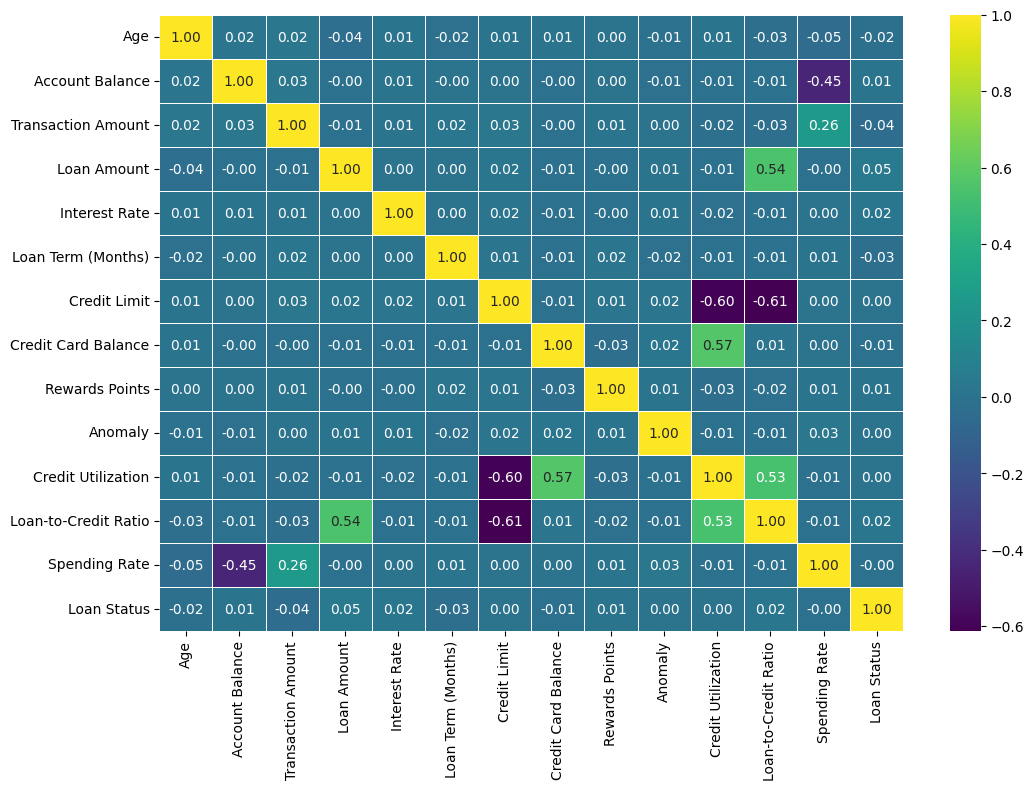

In [508]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(['int64', 'float64']).corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [509]:
# Define the order for Card Type if you have a specific order, else it will use alphabetical order
encoder = OrdinalEncoder()
data[['Card Type', 'Gender', 'Account Type', 'Transaction Type', 'Loan Type']] = encoder.fit_transform(data[['Card Type', 'Gender', 'Account Type', 'Transaction Type', 'Loan Type']]).astype(int)

# To check the result
data.head()

,Age,Gender,Account Type,Account Balance,Transaction Type,Transaction Amount,Loan Amount,Loan Type,Interest Rate,Loan Term (Months),Card Type,Credit Limit,Credit Card Balance,Rewards Points,Anomaly,Credit Utilization,Loan-to-Credit Ratio,Spending Rate,Loan Status
0,45,1,0,1313.38,2,1457.61,32200.06,1,2.64,36,0,1737.88,4524.32,8142,1,2.603356,18.528356,1.109816,2
1,47,0,0,5988.46,0,1660.99,47743.52,0,2.48,36,1,1799.36,856.70,4306,1,0.476114,26.533612,0.277365,0
2,25,0,0,8277.88,0,839.91,47981.31,0,7.84,24,0,6112.96,3242.36,4842,1,0.530408,7.849112,0.101464,1
3,52,2,1,7487.21,2,4908.89,4482.80,2,7.21,48,1,2069.41,4329.17,9463,1,2.091983,2.166221,0.655637,0
4,68,2,1,6993.55,1,589.07,1092.33,1,5.37,12,2,2765.30,25.72,2209,1,0.009301,0.395013,0.084230,0


In [510]:
X = data.drop('Loan Status', axis=1)
y = data['Loan Status']

In [511]:
"""scaler = StandardScaler()
# Scaling the numerical features
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
X"""

'scaler = StandardScaler()\n# Scaling the numerical features\nX_scaled = scaler.fit_transform(X)\nX = pd.DataFrame(X_scaled, columns=X.columns)\nX'

In [512]:
# splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [513]:
# Defining the models to be evaluated
models = {"DecisionTree": DecisionTreeClassifier(random_state=11),
          "SVC": SVC(C=10, random_state=11, kernel='sigmoid', decision_function_shape='ovo', gamma='auto'),
          "RandomForest": RandomForestClassifier(random_state=11),
          "GradientBoosting": GradientBoostingClassifier(max_features='sqrt', n_estimators=200, random_state=11),
          "KNeighbors": KNeighborsClassifier(n_neighbors=100),
          "XGBoost": XGBClassifier(use_label_encoder=False),
          #"LGBM": LGBMClassifier(),
          "CatBoost": CatBoostClassifier(random_state=11, verbose=0)}
# Fitting each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Approved', 'Closed', 'Rejected']))

Model: DecisionTreeClassifier
Accuracy: 0.334
Classification Report:
               precision    recall  f1-score   support

    Approved       0.34      0.33      0.33       337
      Closed       0.31      0.31      0.31       331
    Rejected       0.36      0.36      0.36       332

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.33      0.33      0.33      1000

Model: SVC
Accuracy: 0.337
Classification Report:
               precision    recall  f1-score   support

    Approved       0.34      1.00      0.50       337
      Closed       0.00      0.00      0.00       331
    Rejected       0.00      0.00      0.00       332

    accuracy                           0.34      1000
   macro avg       0.11      0.33      0.17      1000
weighted avg       0.11      0.34      0.17      1000

Model: RandomForestClassifier
Accuracy: 0.332
Classification Report:
               precision    recall  f1-score   s

In [514]:
ct = models['CatBoost'].fit(X_train, y_train)
rf = models['RandomForest'].fit(X_train, y_train)
dt = models['DecisionTree'].fit(X_train, y_train)
gb = models['GradientBoosting'].fit(X_train, y_train)
kn = models['KNeighbors'].fit(X_train, y_train)
svc = models['SVC'].fit(X_train, y_train)
xg = models['XGBoost'].fit(X_train, y_train)
kn_pred = kn.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
xg_pred = xg.predict(X_test)
xg_acc = accuracy_score(y_test, xg_pred)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
ct_pred = ct.predict(X_test)
ct_acc = accuracy_score(y_test, ct_pred)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print(dt_acc)

0.334


In [515]:
bagging = BaggingClassifier(n_estimators=100, random_state=11)
boosting = AdaBoostClassifier(n_estimators=200, estimator=rf, random_state=11)
voting = VotingClassifier(estimators=[("DecisionTree", dt), ("RandomForest", rf)], n_jobs=-1)
stacking = StackingClassifier(final_estimator=svc, estimators=[("CatBoost", ct), ("RandomForest", rf)])

In [516]:
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
st_acc = accuracy_score(y_test, y_pred)
print(f"Model: {stacking.__class__.__name__}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Approved', 'Closed', 'Rejected']))
print("-"*50)

Model: StackingClassifier
Accuracy: 0.331
Classification Report:
               precision    recall  f1-score   support

    Approved       0.33      0.72      0.45       337
      Closed       0.35      0.27      0.30       331
    Rejected       0.00      0.00      0.00       332

    accuracy                           0.33      1000
   macro avg       0.22      0.33      0.25      1000
weighted avg       0.22      0.33      0.25      1000

--------------------------------------------------


In [517]:
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
bg_acc = accuracy_score(y_test, y_pred)
print(f"Model: {bagging.__class__.__name__}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Approved', 'Closed', 'Rejected']))

Model: BaggingClassifier
Accuracy: 0.339
Classification Report:
               precision    recall  f1-score   support

    Approved       0.34      0.42      0.38       337
      Closed       0.32      0.31      0.32       331
    Rejected       0.35      0.28      0.31       332

    accuracy                           0.34      1000
   macro avg       0.34      0.34      0.34      1000
weighted avg       0.34      0.34      0.34      1000



In [518]:
boosting.fit(X_train, y_train)
y_pred = boosting.predict(X_test)
bs_acc = accuracy_score(y_test, y_pred)
print(f"Model: {boosting.__class__.__name__}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Approved', 'Closed', 'Rejected']))

Model: AdaBoostClassifier
Accuracy: 0.354
Classification Report:
               precision    recall  f1-score   support

    Approved       0.36      0.43      0.39       337
      Closed       0.35      0.33      0.34       331
    Rejected       0.36      0.30      0.32       332

    accuracy                           0.35      1000
   macro avg       0.35      0.35      0.35      1000
weighted avg       0.35      0.35      0.35      1000



In [519]:
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
vt_acc = accuracy_score(y_test, y_pred)
print(f"Model: {voting.__class__.__name__}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Approved', 'Closed', 'Rejected']))

Model: VotingClassifier
Accuracy: 0.332
Classification Report:
               precision    recall  f1-score   support

    Approved       0.33      0.55      0.42       337
      Closed       0.31      0.30      0.30       331
    Rejected       0.40      0.14      0.21       332

    accuracy                           0.33      1000
   macro avg       0.35      0.33      0.31      1000
weighted avg       0.35      0.33      0.31      1000



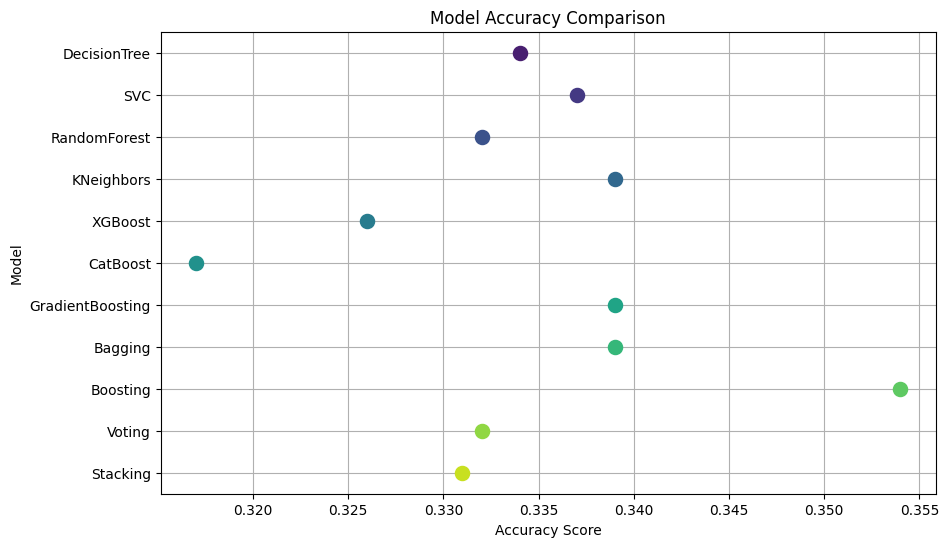

In [520]:
mods = {
    'Model': ['DecisionTree', 'SVC', 'RandomForest', 'KNeighbors', 'XGBoost', 'CatBoost',
              'GradientBoosting', 'Bagging', 'Boosting', 'Voting', 'Stacking'],
    'Accuracy': [dt_acc, svc_acc, rf_acc, kn_acc, xg_acc, gb_acc, ct_acc, bg_acc, bs_acc, vt_acc, st_acc]
}
df = pd.DataFrame(mods)

plt.figure(figsize=(10,6))
sns.pointplot(x='Accuracy', y='Model', data=df, join=False, palette='viridis', markers='o', scale=1.5)
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Feature Importance'}, ylabel='Feature'>

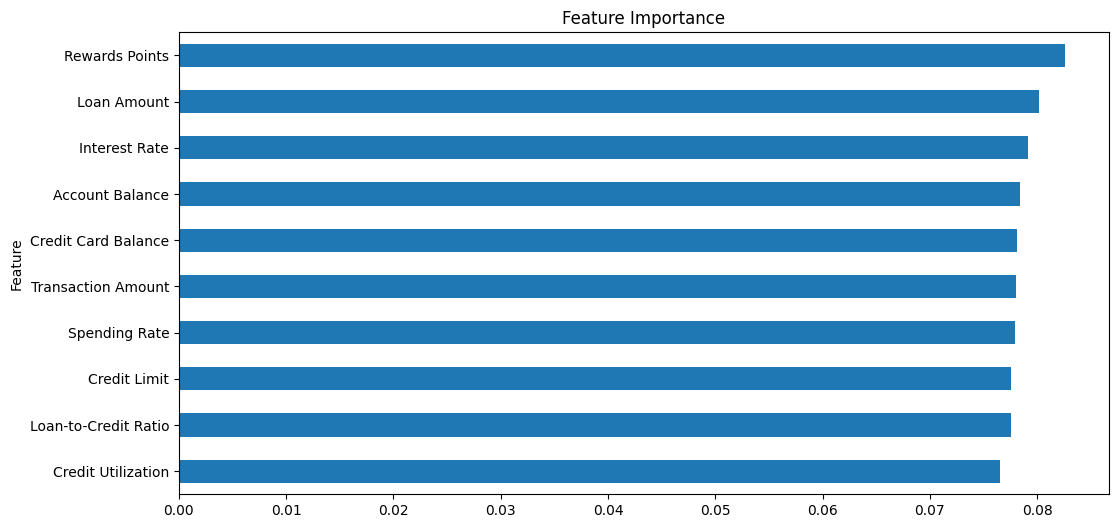

In [521]:
#Decision tree
importance = boosting.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True).tail(10).plot(kind='barh', x='Feature', y='Importance', figsize=(12, 6), legend=False)
plt.title('Feature Importance')
importance_df

In [522]:
importance = boosting.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.to_csv('feature_importance.csv', index=False)

In [532]:
final_data = data[['Age', 'Rewards Points', 'Loan Amount', 'Interest Rate', 'Account Balance', 'Credit Card Balance', 'Transaction Amount',\
                'Spending Rate', 'Credit Limit', 'Loan-to-Credit Ratio', 'Credit Utilization', 'Loan Status']]
final_data.columns = final_data.columns.str.replace(' ', '_')
X1 = final_data.drop('Loan_Status', axis=1)
y1 = final_data['Loan_Status']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=11)
boosting.fit(X1_train, y1_train)
y1_pred = boosting.predict(X1_test)
print(f"Model: {boosting.__class__.__name__}")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Classification Report:\n", classification_report(y1_test, y1_pred, target_names=['Approved', 'Closed', 'Rejected']))

Model: AdaBoostClassifier
Accuracy: 0.354
Classification Report:
               precision    recall  f1-score   support

    Approved       0.34      0.39      0.36       337
      Closed       0.36      0.37      0.37       331
    Rejected       0.36      0.30      0.33       332

    accuracy                           0.35      1000
   macro avg       0.35      0.35      0.35      1000
weighted avg       0.35      0.35      0.35      1000



In [536]:
we = X1.iloc[20].values
boosting.predict([we])


array([1])

In [537]:
joblib.dump(boosting, 'loan_prediction_model.pkl')

['loan_prediction_model.pkl']